### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [553]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(color_codes=True)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [603]:
data_df=pd.read_csv('UTAustin/Assignment1/data.csv')
item_df=pd.read_csv('UTAustin/Assignment1/item.csv')
user_df=pd.read_csv('UTAustin/Assignment1/user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [604]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [556]:
#data_df.head()
data_df.tail()

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [557]:
data_df.shape

(100000, 4)

In [558]:
data_df.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [559]:
sum(data_df.duplicated())

0

In [606]:
data_df.isnull().values.any()

False

In [561]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [562]:
item_df.head()
#item_df.tail()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [563]:
item_df.shape

(1681, 22)

In [564]:
item_df.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [565]:
sum(item_df.duplicated())

0

In [566]:
item_df.isnull().values.any()

False

In [567]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [568]:
#user_df.head()
user_df.tail()

,user id,age,gender,occupation,zip code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [569]:
user_df.shape

(943, 5)

In [570]:
user_df.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [571]:
sum(user_df.duplicated())

0

In [572]:
user_df.isnull().values.any()

False

**Observations:**
- All theattribute are int64 type in data.csv
- No missing vlaue in data.csv
- No duplicates in data.csv

- Two attributes are of object type and rest are of int64 type in item.csv
- No missing vlaue in item.csv
- No duplicates in item.csv

- Three attributes are of object type and two are of int64 type in user.csv
- No missing vlaue in user.csv
- No duplicates in user.csv

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [573]:
item_df[['unknown', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']].sum().sort_values()

unknown          1
Fantasy         22
Film-Noir       24
Western         27
Animation       42
Documentary     50
Musical         56
Mystery         61
War             71
Horror          92
Sci-Fi         101
Crime          109
Childrens      122
Adventure      135
Romance        247
Action         251
Thriller       251
Comedy         505
Drama          725
dtype: int64

**Insights:**
- Drama is most favourite and Fantasy is least favorite genre.


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [574]:
item_df = item_df.drop('unknown', axis=1)

**Insights:**


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [575]:
#crete a filter for above condition
genre=['Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western']
filt = (item_df[genre].sum(axis=1)>1)

# adding a column which has total number of genre for a movie in item.csv
item_df['number of genre']=item_df[genre].sum(axis=1)

#displaying the data  using the filter and getting only two columns necessary

item_df.loc[filt, ['movie title','number of genre']]

#Total number of rows is dispayed at the end of the data frame but we can also use only ony coulmn to count the rows as below
#item_df.loc[filt,'movie title'].count()


,movie title,number of genre
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
7,Babe,3
9,Richard III,2
10,Seven (Se7en),2
11,"Usual Suspects, The",2
13,"Postino, Il",2


**Insights:**
- We have 849 movies with more than one genre


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [576]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


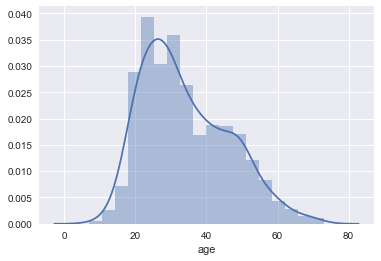

In [577]:
sns.distplot(user_df['age'])
plt.show()

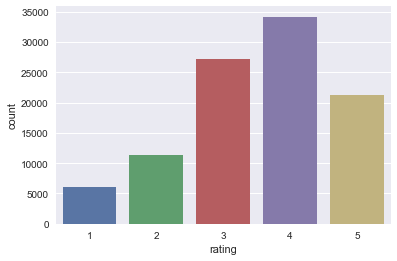

In [578]:
sns.countplot(x='rating',data=data_df)
plt.show()

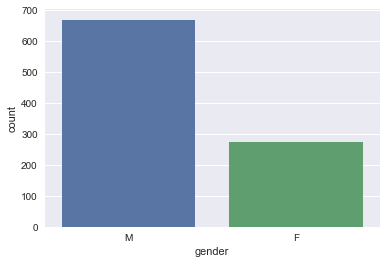

In [579]:
sns.countplot(x='gender',data=user_df)
plt.show()

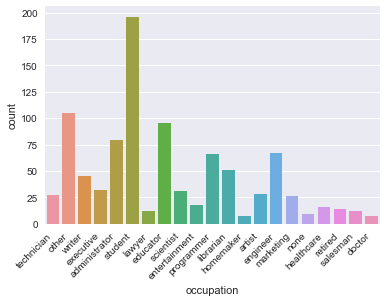

In [580]:
chart=sns.countplot(x='occupation',data=user_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()


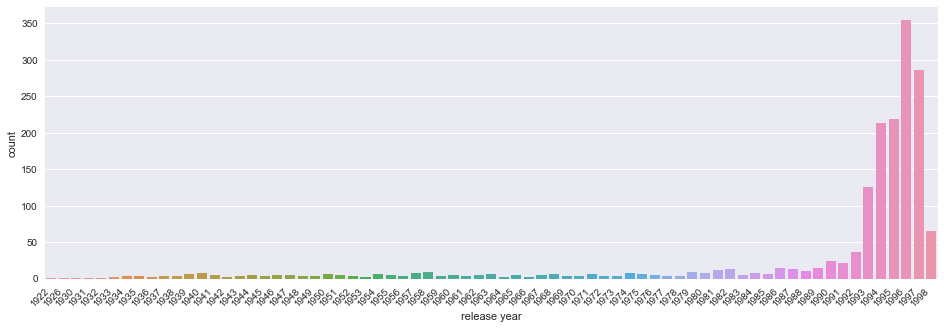

In [655]:
item_df['release year']=item_df['release date'].str.split('-',expand=True)[2]
plt.figure(figsize = (16,5))
chrt=sns.countplot(x='release year',data=item_df)
chrt.set_xticklabels(chrt.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

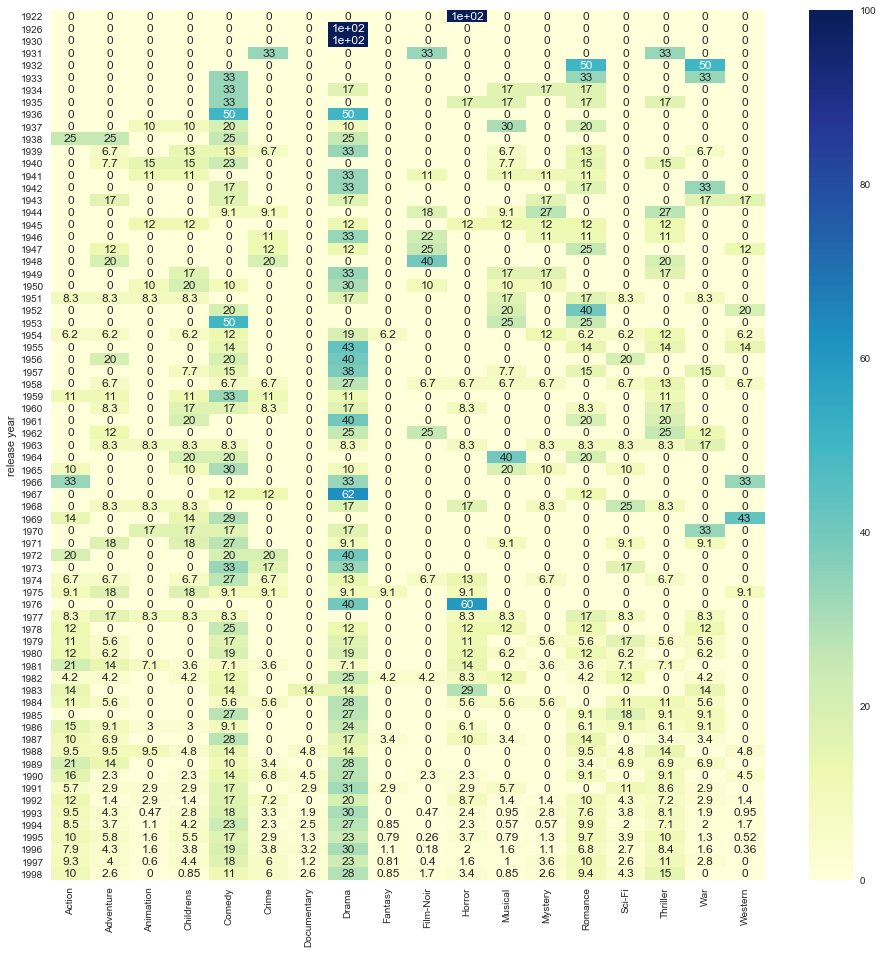

In [582]:
#genre series is already defined above in Question-6 and I am using that here.
new_df=item_df.groupby('release year')[genre].sum()
new_df['total']=new_df[genre].sum(axis=1)
new_df=new_df.div(new_df['total'], axis= 0) * 100
new_df = new_df.drop(['total'],axis=1)
plt.figure(figsize = (16,16))
sns.heatmap(new_df,annot=True,cmap='YlGnBu')
plt.show()

**Insights:**
- Comedty and Drama has been most preferred genre throughout the time frame
- Thriller, Romance, Action was the next prefrred genre after 1990's.
- Documentry Genre started after 1983.
- Horro movies were liked more between 1974-1988.


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [646]:
#aggregating on rating count and mean rating and creating a new DF with respective column names
rating_df=data_df.groupby(['movie id'],as_index=False).agg({'rating':['count','mean']})
rating_df.columns = ['movie id', 'rating count', 'mean rating']

#Creating a filter for rating count greater than 100 and filtering on that condition
fil= (rating_df['rating count']>100)
rating_greater_than_100=rating_df[fil]

#Sorting on 'mean rating' in descendign order
rating_greater_than_100_sorted=rating_greater_than_100.sort_values(by='mean rating',ascending=False)

#mergin  with item_df to capture the movie names
merged = pd.merge(rating_greater_than_100_sorted, item_df,on='movie id',how='left')

#Selecting only the required columns out
final= merged[['movie id','movie title','rating count','mean rating']]

#Displaying top 25
final.head(25)

,movie id,movie title,rating count,mean rating
0,408,"Close Shave, A",112,4.491071
1,318,Schindler's List,298,4.466443
2,169,"Wrong Trousers, The",118,4.466102
3,483,Casablanca,243,4.456790
4,64,"Shawshank Redemption, The",283,4.445230
5,603,Rear Window,209,4.387560
6,12,"Usual Suspects, The",267,4.385768
7,50,Star Wars,583,4.358491
8,178,12 Angry Men,125,4.344000
9,134,Citizen Kane,198,4.292929


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [747]:
data_merged=item_df.merge(data_df, on='movie id').merge(user_df, on='user id')
gender_wise_count=data_merged.groupby('gender')['rating'].count()
gender_wise_count

gender
F    25738
M    74253
Name: rating, dtype: int64

In [748]:
drama_filter=drama['Drama']==1
drama=drama[drama_filter]
drama_count=drama.groupby('gender')['rating'].count()
drama_count.div(gender_wise_count)*100

gender
F    42.769446
M    38.903479
Name: rating, dtype: float64

In [749]:
scifi_filter=sci_fi['Sci-Fi']==1
scifi=sci_fi[scifi_filter]
scifi_count=scifi.groupby('gender')['rating'].count()
scifi_count.div(gender_wise_count)*100

gender
F    10.214469
M    13.603491
Name: rating, dtype: float64

In [750]:
romance_filter=romance['Romance']==1
romance=sci_fi[romance_filter]
romance_count=romance.groupby('gender')['rating'].count()
romance_count.div(gender_wise_count)*100

gender
F    22.760121
M    18.319799
Name: rating, dtype: float64

**Conclusion:**
- Men watch more drama than women - False
- Women watch more Sci-Fi than men - False
- Men watch more Romance than women - Flase
